In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

#Import data
df = pd.read_csv('df_temporal.csv',index_col=0)
df.set_index(['ID','time','t'],drop=True,inplace=True)
df.reset_index(drop=False,inplace=True)
df.fillna(0,inplace=True)
ids = df.ID.unique()

window = 5
t_test = []
t_pred = []
test_id = []

In [5]:
ids2 = ids.tolist()[1:7]
ids2.extend(ids.tolist()[8:10])
ids2.extend(ids.tolist()[11:len(ids)])
del ids2[22]
ids2 = np.array(ids2)

In [6]:
for i in ids:
    X = df[df.ID.values == i].iloc[:,range(3,len(df.columns))]
    
    last = int(len(df[df.ID.values == i])/5)
    X_train = X[:-last]
    X_test = X[-last-window:]
    in_tr = []
    out_tr = []
    for j in range(window,len(X_train)):
        in_tr.append(np.array(X_train.iloc[j-window:j,:]))
        out_tr.append(np.array(X_train.iloc[j,0]))
     
    in_tr, out_tr = np.array(in_tr), np.array(out_tr)

    in_te = []
    out_te = []
    for j in range(window,len(X_test)):
        in_te.append(np.array(X_test.iloc[j-window:j,:]))
        out_te.append(np.array(X_test.iloc[j,0]))
     
    in_te, out_te = np.array(in_te), np.array(out_te)

    model = Sequential()

    model.add(LSTM(128, input_shape=(in_tr.shape[1:]), activation='tanh',return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(128, input_shape=(in_tr.shape[1:]), activation='tanh',return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, input_shape=([in_tr.shape[0],128]), activation='sigmoid'))

    model.compile(loss='mse',optimizer='adam')
    model.fit(in_tr, out_tr, epochs=100,verbose=0,batch_size=1)

    t_test.extend(out_te.tolist())
    test_id.extend(np.repeat(i,len(out_te)))
    predictions = model.predict(in_te)
    for pred in range(len(predictions)):
        t_pred.append(predictions.tolist()[pred][0])
    print(i)


AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [4]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(t_test,t_pred)
print(MSE)

0.0797108816034076


In [5]:
d={'ID':test_id,'t_test':t_test,'t_pred':t_pred}
d2 = {'ID':list(set(test_id)),'MSE':np.repeat(np.nan,len(set(test_id)))}
indiv = pd.DataFrame(d)
indiv2 = pd.DataFrame(d2)

In [6]:
for i in ids:
    d_help = indiv.loc[indiv['ID'] == i]
    mse=mean_squared_error(d_help.t_test,d_help.t_pred)
    indiv2.loc[indiv2['ID']==i,'MSE'] = mse


In [7]:
indiv_length = []
indiv_no = []
for i in ids:
    df_help = indiv.loc[indiv['ID'] == i]
    indiv_length.append(len(df_help))
    indiv_no.append(i)
    
indiv_length

[9,
 8,
 9,
 10,
 9,
 9,
 12,
 9,
 8,
 10,
 9,
 11,
 10,
 11,
 9,
 9,
 8,
 11,
 6,
 13,
 8,
 7,
 8,
 9,
 8,
 8,
 9]

In [12]:
#indiv['id_no'] =
indiv2 = indiv2.sort_values(by=['id_no'],axis=0)

#df.sort_values(by=['col1'])


In [19]:
ids2 = ids.tolist()[0:6]
ids2.append(ids.tolist()[9])
ids2.extend(ids.tolist()[11:len(ids)])
del ids2[len(ids2)-2]
ids2 = np.array(ids2)


array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.13', 'AS14.15', 'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20',
       'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28',
       'AS14.29', 'AS14.30', 'AS14.31', 'AS14.33'], dtype='<U7')

In [14]:
ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [23]:
indiv2 = indiv2.loc[indiv2['ID'].isin(ids2)]
np.mean(indiv2['MSE'])

0.05653363373476255

In [9]:
mse = indiv2['MSE']
indiv2['id_no'] = np.nan
for a in range(len(indiv2)):
    indiv2.iloc[:,2].iloc[a] = indiv2['ID'].values.tolist()[a][-2:]
id_no = indiv2['id_no']
#plt.bar

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


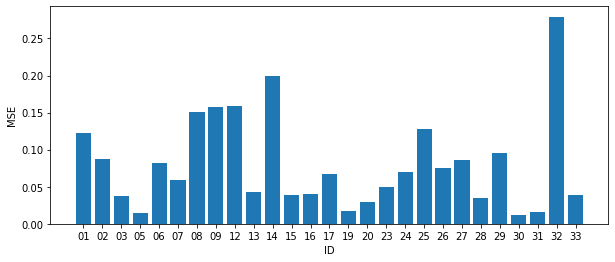

In [13]:
mse = indiv2['MSE']
id_no = indiv2['id_no']
fig, axs = plt.subplots(1, 1, figsize=(10,4))
axs.bar(id_no,mse)
axs.set(xlabel='ID',ylabel="MSE")


fig.savefig('indiv_mse.pdf',dpi=300)


t_pred = model.predict(in_te)
plt.figure()
plt.plot(t_pred,':',label='LSTM')
plt.plot(t_test,'--',label='Actual')
plt.legend()